<a href="https://colab.research.google.com/github/vmcarranzam/labsl1/blob/main/Lab_1_Statistical_Learning_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cuadernos de Statistical Learning I/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


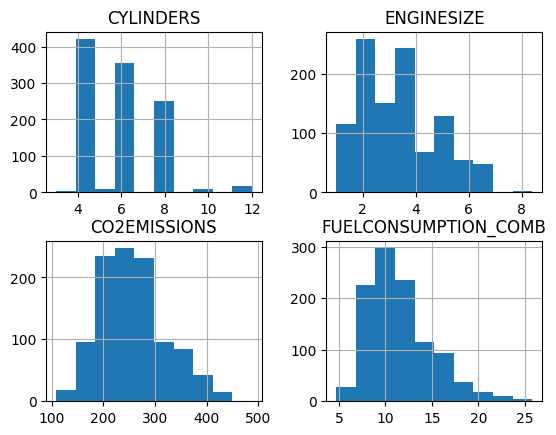

In [ ]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

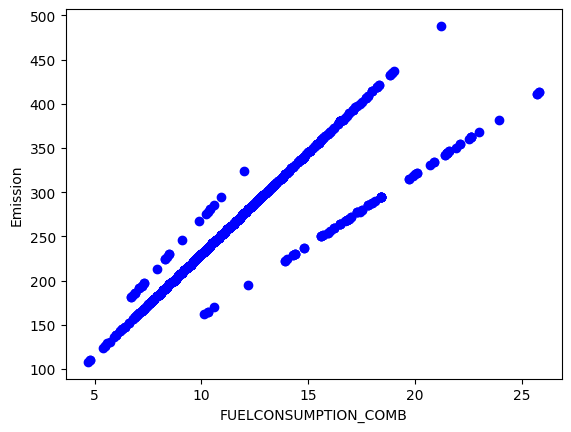

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

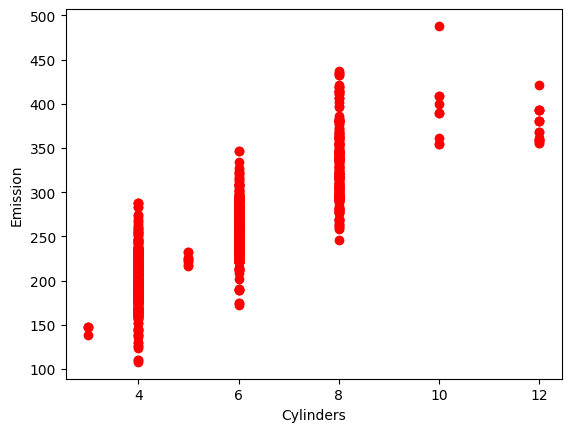

In [ ]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

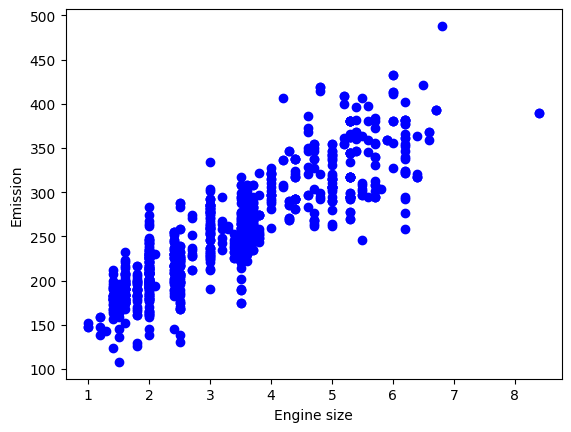

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.70260783]]
Intercept:  [126.43476755]


Text(0, 0.5, 'Emission')

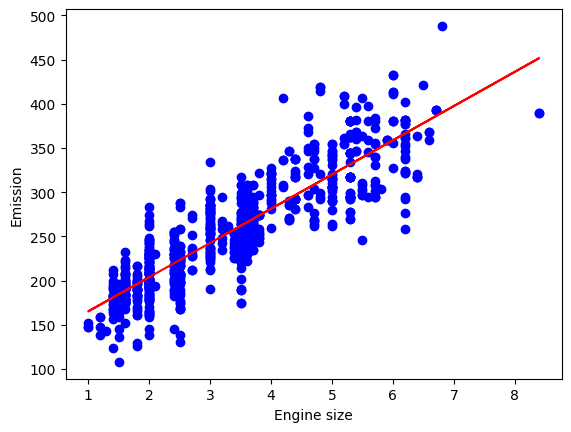

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Error medio absoluto: 24.79
Suma residual de los cuadrados (MSE): 1143.52
R2-score: 0.61


##K-Fold Cross Validation

In [ ]:
X = df['ENGINESIZE']
y = df['CO2EMISSIONS']
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=10)
lr = linear_model.LinearRegression()

In [ ]:
for train_index, val_index in kf.split(X):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]
    
    lr.fit(np.array(X_train).reshape(-1, 1), y_train)
    score = lr.score(np.array(X_val).reshape(-1, 1), y_val)
    
    print(f'Fold score: {score}, coef: {lr.coef_}, intercept: {lr.intercept_}')

Fold score: 0.7176196958259152, coef: [39.39918757], intercept: 124.10132175538084
Fold score: 0.7737680441896135, coef: [39.29564634], intercept: 124.77425163727295
Fold score: 0.8275224633737195, coef: [38.80678492], intercept: 126.62209797564975
Fold score: 0.7196328920951014, coef: [38.84198937], intercept: 126.25840867557471
Fold score: 0.7743166936599838, coef: [39.2953274], intercept: 124.74207653044235


##Multivariable regression

In [ ]:
Xm = df.drop(['CO2EMISSIONS','MAKE','MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis=1)
ym = df['CO2EMISSIONS']
lrm = linear_model.LinearRegression()
Xm.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2014,2.0,4,9.9,6.7,8.5,33
1,2014,2.4,4,11.2,7.7,9.6,29
2,2014,1.5,4,6.0,5.8,5.9,48
3,2014,3.5,6,12.7,9.1,11.1,25
4,2014,3.5,6,12.1,8.7,10.6,27


In [ ]:
for train_index, val_index in kf.split(X):
    X_train, y_train = Xm.iloc[train_index], ym.iloc[train_index]
    X_val, y_val = Xm.iloc[val_index], ym.iloc[val_index]
    
    lrm.fit(X_train, y_train)
    score = lrm.score(X_val, y_val)
    
    print(f'Fold score: {score}, coef: {lrm.coef_}, intercept: {lrm.intercept_}')

Fold score: 0.8916749754831874, coef: [ 0.          8.87845128  8.27578345  0.75392946  7.29228555 -4.96333494
 -4.03513877], intercept: 263.22274642066367
Fold score: 0.9029419419265987, coef: [  0.           8.46742102   8.54769923 -12.87872091  -4.71415216
  20.69476581  -3.93151281], intercept: 258.08626192843644
Fold score: 0.901961953810241, coef: [  0.           8.08986122   7.56400408 -14.88609185  -7.52793912
  25.82496611  -4.00201156], intercept: 261.39971961462714
Fold score: 0.8594152860095715, coef: [  0.           8.1717448    7.75312808 -23.66694279 -14.56924093
  42.46513035  -3.73962714], intercept: 244.06682018569046
Fold score: 0.8632954974561108, coef: [ 0.          9.13587228  6.41576249 -2.56526411  1.9229559   5.1998153
 -3.65360428], intercept: 241.322274720668
